# Backup

In [1]:
executed_yet = False

In [2]:
import os

if not executed_yet:
    executed_yet = True
    original_working_directory_path = os.getcwd()
    os.chdir(os.path.join(original_working_directory_path, "../.."))
    root_working_directory_path =  os.getcwd()
    
print(f'Original working directory: {original_working_directory_path}')
print(f'Current working directory: {root_working_directory_path}')

Original working directory: /Users/jankreischer/Library/Mobile Documents/com~apple~CloudDocs/Master-Thesis/Code/prototypes/prototype_02
Current working directory: /Users/jankreischer/Library/Mobile Documents/com~apple~CloudDocs/Master-Thesis/Code


In [228]:
import matplotlib.pyplot as plt

def plot_loss_history(history):
    epochs = history[:, 'epoch']
    training_losses = history[:, 'train_loss']
    validation_losses = history[:, 'valid_loss']
    plt.plot(epochs, training_losses, color='blue', label='training loss')
    plt.plot(epochs, validation_losses, color='red', label='validation loss')
    plt.legend()
    plt.show()

In [228]:
history = model.history
plot_loss_history(history)

## Effect of averaging over different window size for the learning curve

In [110]:
client = server.clients[0]
print(type(client))

def plot_learning_curve(client, N=20):
    title = f"Learning Curve / Average Return with Sliding Window Size {N}"
    returns =  []
    epsilons = []
    returns, epsilons = client.get_training_summary()

    assert len(returns) == len(epsilons)
    x = [i + 1 for i in range(len(returns))]
    fig = plt.figure()

    ax = fig.add_subplot(111, label="1")
    ax2 = fig.add_subplot(111, label="2", frame_on=False)
    ax.set_title(title)

    color_1 = "red"
    ax.plot(x, epsilons, color=color_1)
    ax.set_xlabel("Episode", color='black')
    ax.set_ylabel("Epsilon", color=color_1)
    ax.set_ylim([0, 1])
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors=color_1)

    #N = len(returns)
    #running_avg = np.empty(N)
    #for t in range(N):
    #    running_avg[t] = np.mean(returns[max(0, t - 20):(t + 1)])
    
    running_avg = np.convolve(returns, np.ones(N)/N, mode='valid')
    x = [i + 1 for i in range(len(running_avg))]
    
    color_2 = "blue"
    ax2.scatter(x, running_avg, color=color_2, s=2 ** 2)
    ax2.axes.get_xaxis().set_visible(False)
    ax2.yaxis.tick_right()
    ax2.set_ylabel('Average Return', color=color_2)
    ax2.set_ylim([0, 1])
    ax2.yaxis.set_label_position('right')
    ax2.tick_params(axis='y', colors=color_2)
    plt.show()

<class 'client.Client'>


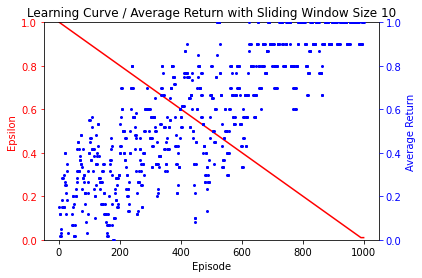

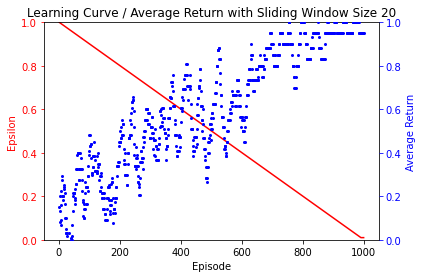

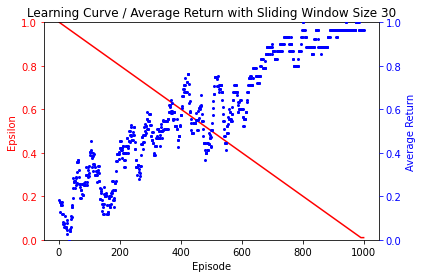

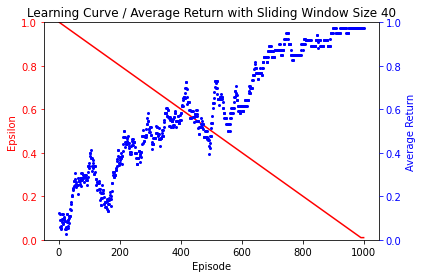

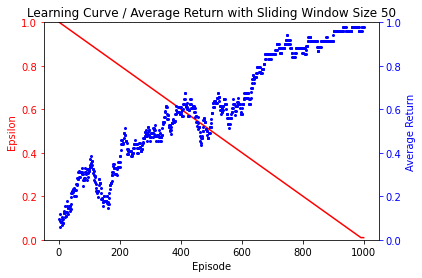

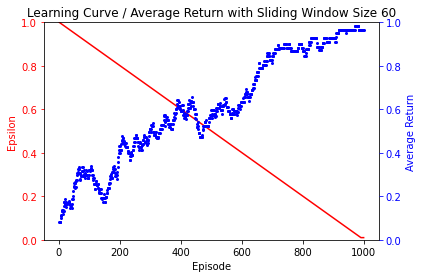

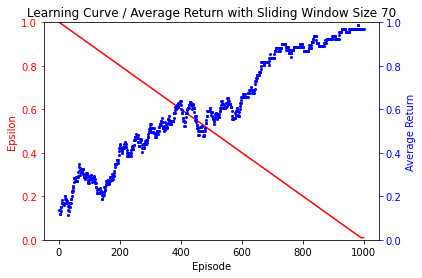

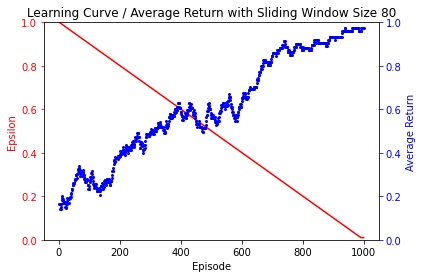

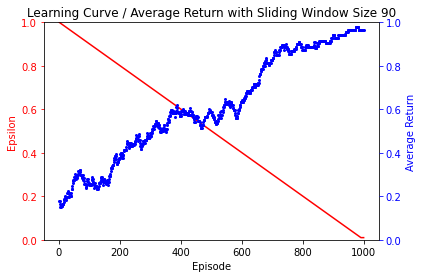

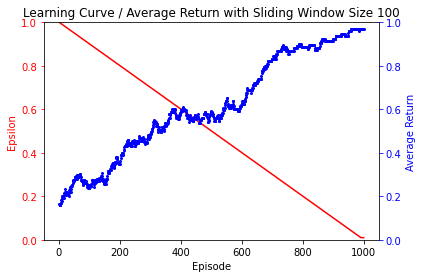

In [111]:
for N in range(10, 110, 10):
    plot_learning_curve(client, N)

## Boxplots

In [147]:
import pandas as pd

normal_samples = training_data[Behavior.NORMAL][:,:-1].astype(float)
rootkit_beurk_samples = training_data[Behavior.ROOTKIT_BEURK][:,:-1].astype(float)
print(rootkit_beurk_samples.shape)

df_beurk = pd.DataFrame(rootkit_beurk_samples)

print(df_beurk.head(10))
print(type(df_beurk))

(4711, 46)
         0         1         2    3         4    5         6         7    8   \
0  0.122340  0.466667  0.222222  0.5  0.066667  0.5  0.291667  0.052483  0.0   
1  0.122340  0.600000  0.333333  1.0  0.066667  0.5  0.375000  0.036117  0.5   
2  0.175532  0.266667  0.444444  0.5  0.800000  0.0  0.416667  0.831828  0.5   
3  0.271277  0.466667  0.222222  0.5  0.066667  0.5  0.291667  0.553047  0.0   
4  0.367021  0.466667  0.222222  0.5  0.000000  0.5  0.333333  0.703160  0.0   
5  0.234043  0.466667  0.222222  0.5  0.333333  0.5  0.250000  0.704007  0.0   
6  0.877660  0.533333  0.333333  1.0  0.000000  1.0  0.416667  0.626693  0.0   
7  0.281915  0.600000  0.222222  0.5  0.133333  0.5  0.291667  0.701749  0.0   
8  0.148936  0.466667  0.222222  0.5  0.733333  1.0  0.333333  0.310102  0.0   
9  0.143617  0.466667  0.222222  0.5  0.066667  0.5  0.291667  0.709650  0.0   

         9   ...   36     37        38   39        40        41   42  \
0  0.399895  ...  0.0  0.000  0.1451

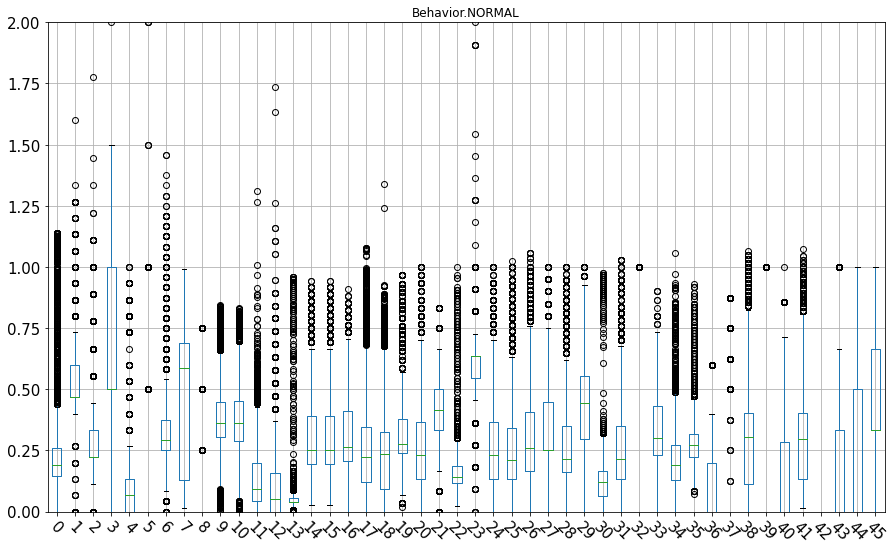

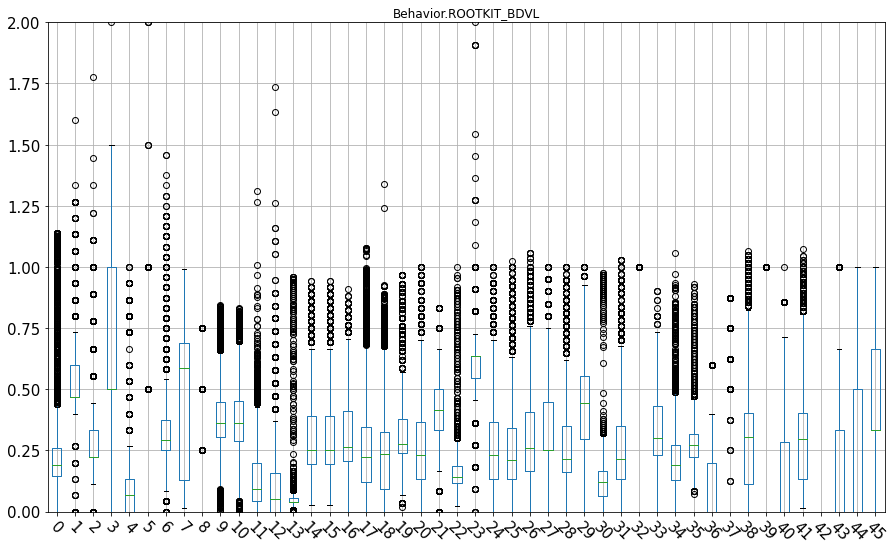

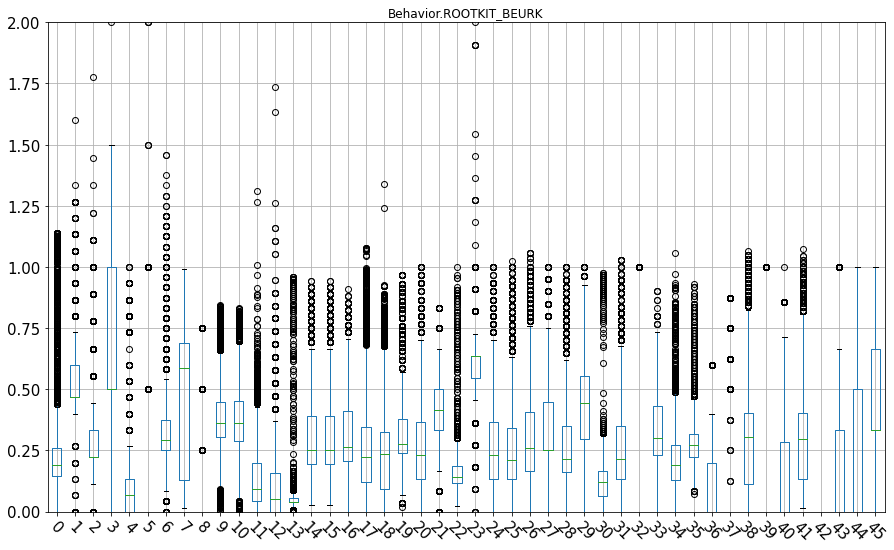

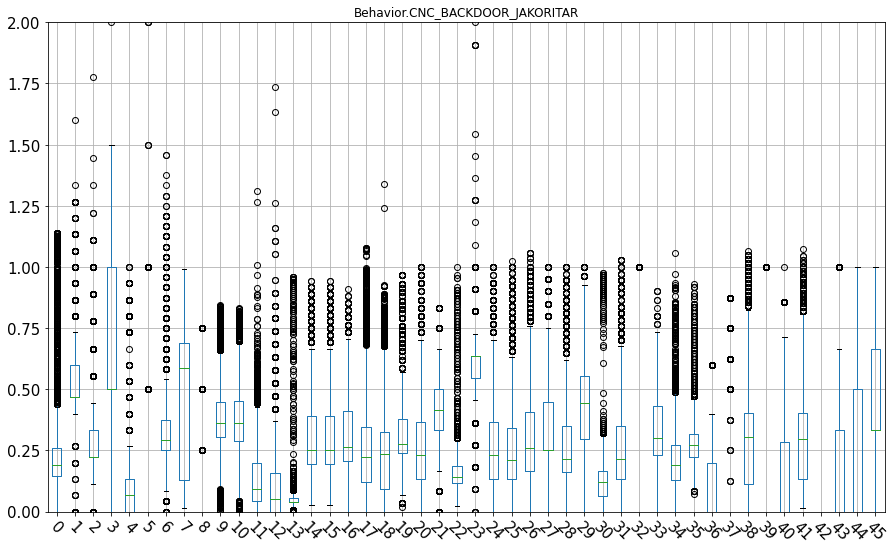

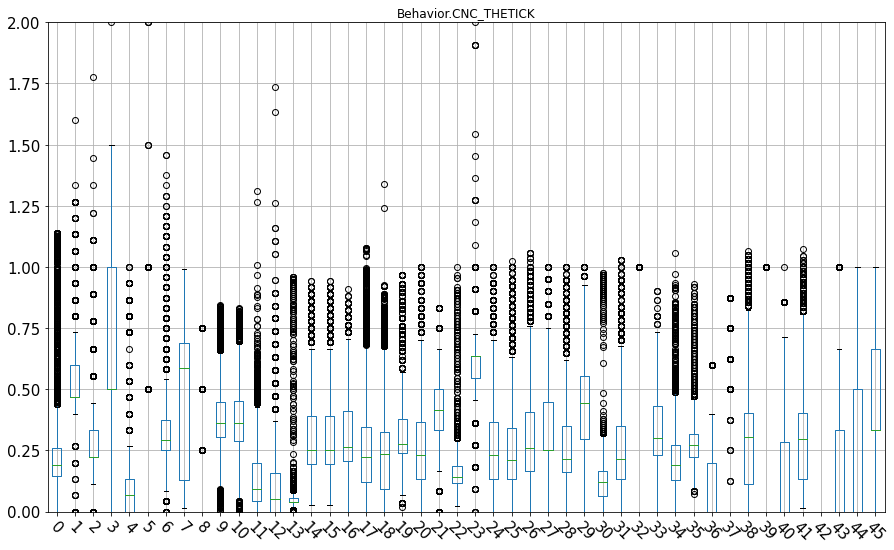

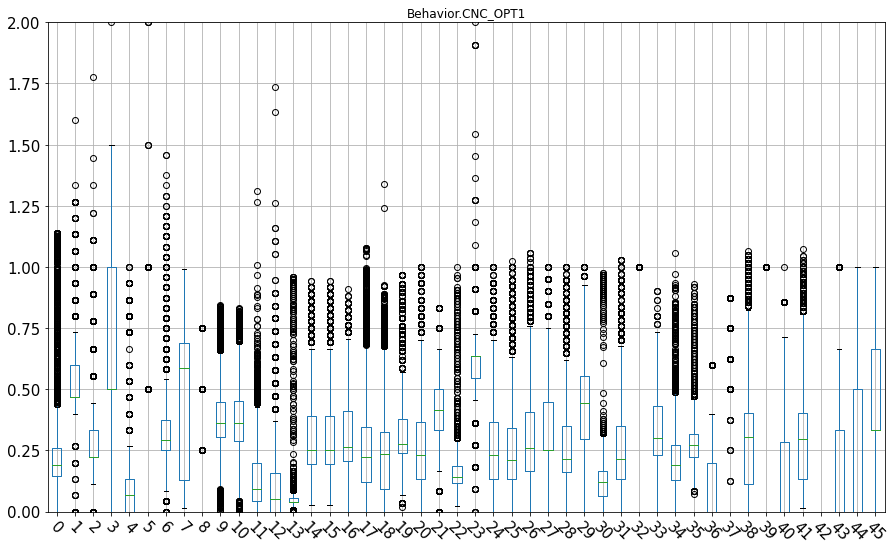

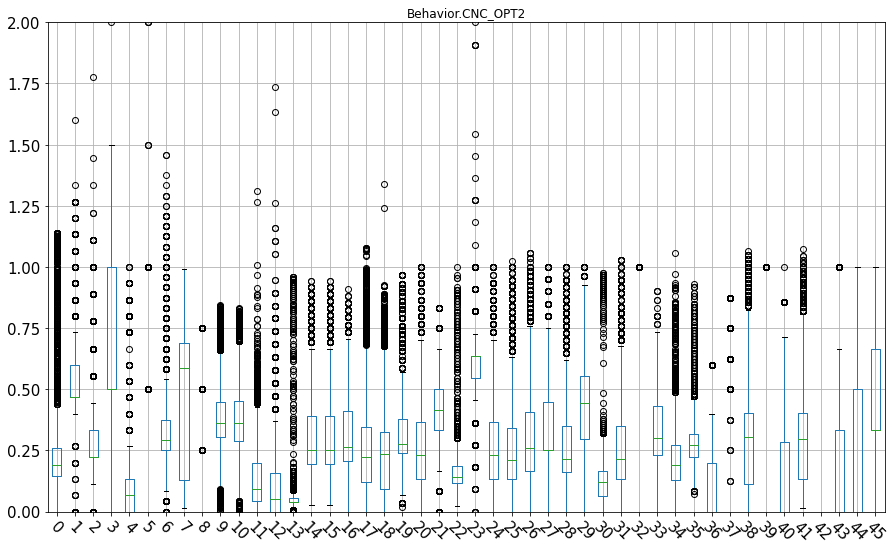

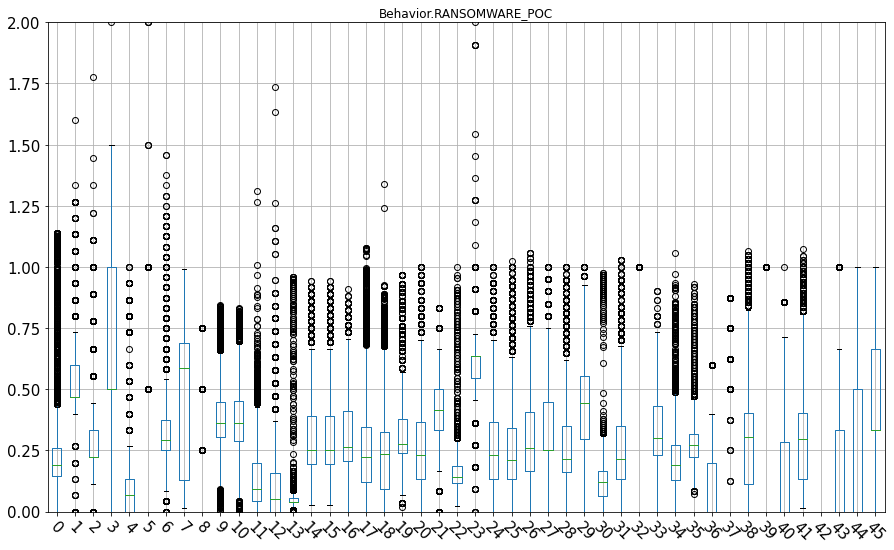

In [165]:
for behavior in Behavior:
    samples = training_data[behavior][:,:-1].astype(float)
    boxplot = df_beurk.boxplot(grid=True, rot=-45, fontsize=15, figsize=(15, 9), notch=False) 
    plt.ylim([0,2])
    plt.title(behavior)
    plt.show()

In [141]:
quantiles = df_beurk.quantile(
    q=0.5,                      # The percentile to calculate
    axis=0,                     # The axis to calculate the percentile on
    numeric_only=True,         # To calculate only for numeric columns
    interpolation='linear'      # The type of interpolation to use when the quantile is between 2 values
)
print(quantiles)

Series([], Name: 0.5, dtype: float64)


## Illustrating the sampling probabilities

In [4]:
import numpy as np

def multiclass_imbalance_degree(M):
    N = np.sum(M)
    n_cs = np.sum(M, axis=0)

    C = len(n_cs)
    MID = 0
    for n_c in n_cs:
        relative_label_frequency =  n_c / N
        MID+=relative_label_frequency*np.emath.logn(C, C*relative_label_frequency)   
    return round(MID, 4)

In [5]:
from numpy.linalg import norm

'''
    This function computes the mean cosine similarity 
    for a numpy 2d matrix
    For each client one row is added to the matrix
    Each row contains the sample frequency for each label as columns
'''
def mean_cosine_similarity(lis):
    L = np.sum(lis, axis=0)
    L_two_norm = norm(L, 2)
    n = lis.shape[0]

    mean_cosine_similarity = 0
    for li in lis:
        mean_cosine_similarity += (1 / n) * (np.dot(L,li) / (L_two_norm * norm(li, 2)))

    return mean_cosine_similarity

In [6]:
from numpy.linalg import norm

'''
    This function computes the mean cosine similarity 
    for a numpy 2d matrix
    For each client one row is added to the matrix
    Each row contains the sample frequency for each label as columns
'''
def weighted_cosine_similarity(lis):
    L = np.sum(lis, axis=0)
    L_one_norm = norm(L, 1)
    L_two_norm = norm(L, 2)
    #n = lis.shape[0]

    cosine_similarity = 0
    for li in lis:
        li_one_norm = norm(li, 1)
        li_two_norm = norm(li, 2)
        cosine_similarity +=  (li_one_norm/li_two_norm) * np.dot(L,li) 

    weighted_cosine_similarity = 1/(L_one_norm * L_two_norm)*cosine_similarity
    return round(weighted_cosine_similarity, 4)

Scenario 01 with MID: 0.0; WCS: 1.0


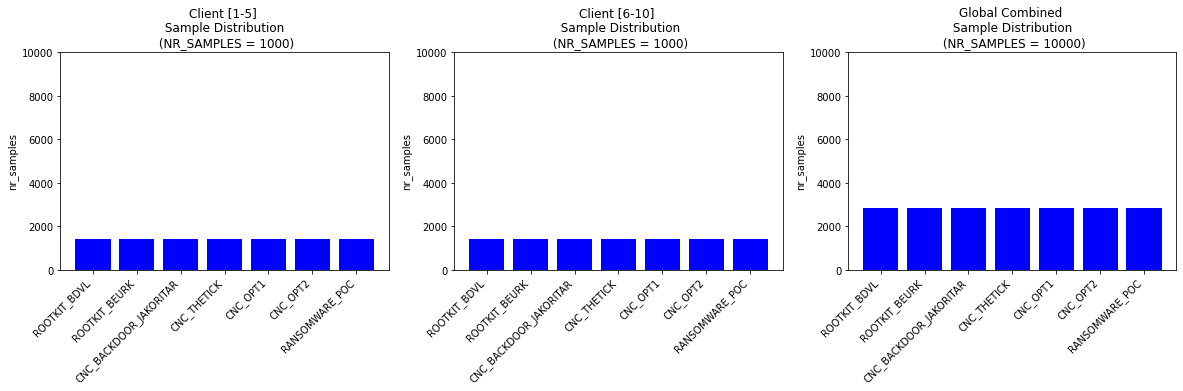

Scenario 02 with MID: 0.0267; WCS: 1.0


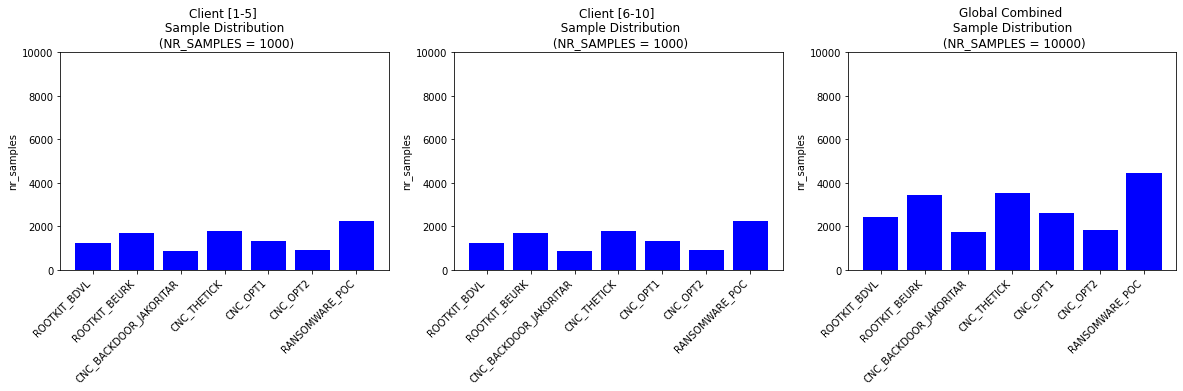

Scenario 03 with MID: -0.0; WCS: 0.9516


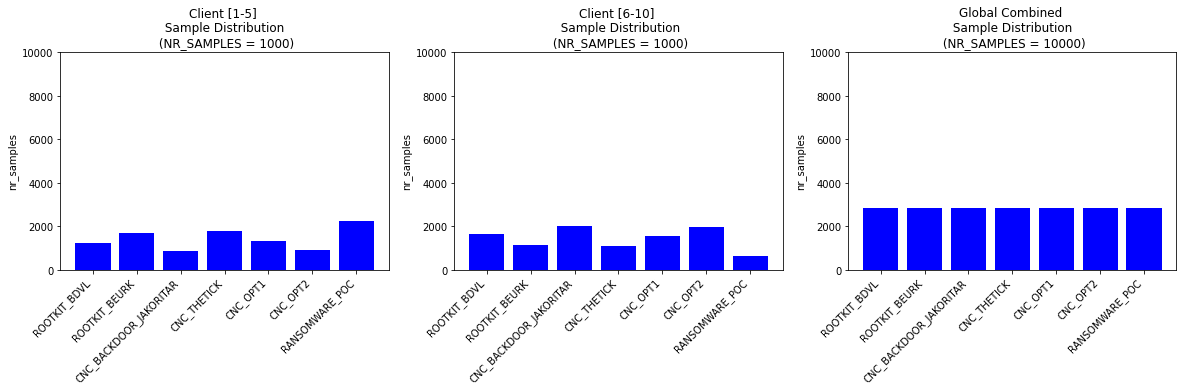

Scenario 04 with MID: 0.0066; WCS: 0.9878


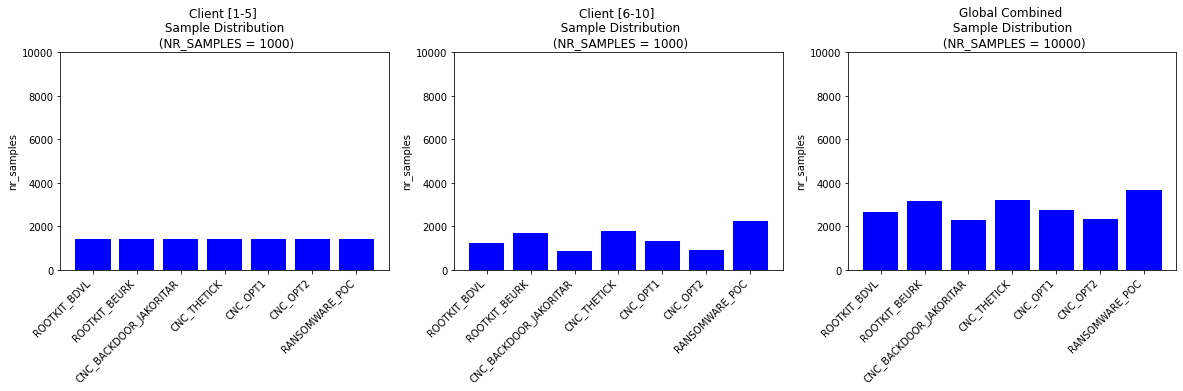

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from src.custom_types import MTDTechnique, Behavior
from functools import reduce

fig = plt.gcf()
#fig.suptitle("Title centered above all subplots", fontsize=14)
plt.rcParams["figure.figsize"] = (20,4)

N_SAMPLES = 10000


unit_sampling_probabilities = {
    #Behavior.NORMAL: 0,
    Behavior.ROOTKIT_BDVL: 1/7,
    Behavior.ROOTKIT_BEURK: 1/7,
    Behavior.CNC_BACKDOOR_JAKORITAR: 1/7,
    Behavior.CNC_THETICK: 1/7, 
    Behavior.CNC_OPT1: 1/7,
    Behavior.CNC_OPT2: 1/7,
    Behavior.RANSOMWARE_POC: 1/7
}

regular_sampling_probabilities = {
    #Behavior.NORMAL: 0,
    Behavior.ROOTKIT_BDVL: 0.12235818,
    Behavior.ROOTKIT_BEURK: 0.17105027,
    Behavior.CNC_BACKDOOR_JAKORITAR: 0.08568661,
    Behavior.CNC_THETICK: 0.17732965,
    Behavior.CNC_OPT1: 0.13046754,
    Behavior.CNC_OPT2: 0.09060246,
    Behavior.RANSOMWARE_POC: 0.22250529,
}

inverted_sampling_probabilities = {
    #Behavior.NORMAL: 0,
    Behavior.ROOTKIT_BDVL: 2/7 - 0.12235818,
    Behavior.ROOTKIT_BEURK: 2/7 - 0.17105027,
    Behavior.CNC_BACKDOOR_JAKORITAR: 2/7 - 0.08568661,
    Behavior.CNC_THETICK: 2/7 - 0.17732965, 
    Behavior.CNC_OPT1: 2/7 - 0.13046754,
    Behavior.CNC_OPT2: 2/7 - 0.09060246,
    Behavior.RANSOMWARE_POC: 2/7 - 0.22250529,
}

list_of_behaviors = list(map(lambda x: x.name, unit_sampling_probabilities.keys()))

for sampling_distribution in [unit_sampling_probabilities, regular_sampling_probabilities, inverted_sampling_probabilities]:
    sum_of_percentages = round(reduce(lambda x, y: x+y, sampling_distribution.values()), 2)
    assert sum_of_percentages == 1, f"Make sure that all percentages sum to 100. Right now it is {sum_of_percentages}"

combinations = [
    (unit_sampling_probabilities, unit_sampling_probabilities),
    (regular_sampling_probabilities, regular_sampling_probabilities),
    (regular_sampling_probabilities, inverted_sampling_probabilities),
    (unit_sampling_probabilities, regular_sampling_probabilities)
]

sample_frequency_combinations = []
sample_matrices = []

for combination in combinations:
    sampling_probabilities_1, sampling_probabilities_2 = combination
    
    n_samples_1 = np.array(list(sampling_probabilities_1.values()))*N_SAMPLES
    n_samples_2 = np.array(list(sampling_probabilities_2.values()))*N_SAMPLES
    total_samples = n_samples_1 + n_samples_2
    
    sample_matrix = np.vstack([n_samples_1, n_samples_2])
    sample_matrices.append(sample_matrix)

    #print(f"MID: {multiclass_imbalance_degree(sample_matrix)}; WCS: {weighted_cosine_similarity(sample_matrix)}")

    sample_frequency_combinations.append({
        1: n_samples_1,
        2: n_samples_2,
        3: total_samples,
    })
       
titles = {
    1: "Client [1-5] \n Sample Distribution \n (NR_SAMPLES = 1000)",
    2: "Client [6-10] \n  Sample Distribution \n (NR_SAMPLES = 1000)",
    3: "Global Combined \n Sample Distribution \n (NR_SAMPLES = 10000)",
}

scenario_id = 1
for sample_frequencies in sample_frequency_combinations:
    sample_matrix = np.vstack([sample_frequencies[1], sample_frequencies[2]])
    print(f"Scenario 0{scenario_id} with MID: {multiclass_imbalance_degree(sample_matrix)}; WCS: {weighted_cosine_similarity(sample_matrix)}")
    
    scenario_id = scenario_id + 1
    
    for i in range(1, 4):
        plt.subplot(1, 3, i)
        plt.bar(range(len(sample_frequencies[i])), (sample_frequencies[i]), align='center', color='blue')
        plt.xticks(range(len(list_of_behaviors)), list_of_behaviors)
        plt.xticks(rotation=45, ha='right')
        plt.ylim([0, 10000])
        plt.title(titles[i])
        plt.ylabel('nr_samples')
    plt.show()

## Initial Autoencoder

In [ ]:
# Autoencoder trained using the hyperparameters from Timo Schenks work
initial_autoencoder = AutoEncoder(initial_autoencoder_architecture(), ae_valid_x, ae_test_x, ae_test_y, evaluation_data)
initial_autoencoder.pretrain(ae_training_x, optimizer=torch.optim.SGD(autoencoder.parameters(), lr=1e-4, momentum=0.9), num_epochs=100, batch_size=64, verbose=False)
initial_autoencoder.evaluate(num_std=2.5, tablefmt='latex_raw')

-----------
\begin{tabular}{llllll}
\hline
 Behavior                 & Accuracy   & Precision      & Recall         & F1-Score       & #Samples   \\
\hline
 NORMAL                   & 98.64\%    & \notCalculated & \notCalculated & \notCalculated & \2800      \\
 RANSOMWARE\_POC          & 100.00\%   & \notCalculated & \notCalculated & \notCalculated & \400       \\
 ROOTKIT\_BDVL            & 89.00\%    & \notCalculated & \notCalculated & \notCalculated & \400       \\
 ROOTKIT\_BEURK           & 1.75\%     & \notCalculated & \notCalculated & \notCalculated & \400       \\
 CNC\_THETICK             & 2.00\%     & \notCalculated & \notCalculated & \notCalculated & \400       \\
 CNC\_BACKDOOR\_JAKORITAR & 0.25\%     & \notCalculated & \notCalculated & \notCalculated & \400       \\
 CNC\_OPT1                & 9.75\%     & \notCalculated & \notCalculated & \notCalculated & \400       \\
 CNC\_OPT2                & 100.00\%   & \notCalculated & \notCalculated & \notCalculated & \400      